The datasets in which we will be using here were obtained via open sources.

---

Let's begin with importing our neeed libraries.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

 The K-Nearest Neighbors (or KNN) model is a non-parametric model. Let's begin by making a model by hand to classify iris flower data. Then we will automatedly make a model using KNN.

In [2]:
# Let's read in the data #
data = './data/iris.data'
iris = pd.read_csv(data)

iris.head(30)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Let's do "human learning" with the iris data.

In [3]:
# We see the data consists of 5 columns (the 4 features & response) #
# How about the number of total observations? #
print('number of observations:',iris.shape[0],'\nnumber of columns:',iris.shape[1])

number of observations: 150 
number of columns: 5


In [4]:
# Let's take a look at the data types #
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
# Let's verify that the basic stats look appropriate #
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Let's check for imbalanced classes #
iris.species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

In [7]:
# Let's verify we are not missing any data either #
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# Let's sort the DataFrame by petal_width #
iris.sort_values(by='petal_width', ascending=True, inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa


In [9]:
# Let's sort the DataFrame by petal_width and display the array #
iris.sort_values(by='petal_width', ascending=True).values[0:5]

array([[5.2, 4.1, 1.5, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa']], dtype=object)

In [10]:
# Let's find the mean of sepal_length, grouped by species #
iris.groupby(by='species', axis=0).sepal_length.mean()

species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64

In [11]:
# Let's find the mean of all numeric columns, grouped by species #
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [12]:
# Let's check the statistics of all the numeric columns, grouped by species #
iris.groupby('species').describe().T

species             Iris-setosa  Iris-versicolor  Iris-virginica
sepal_length count    50.000000        50.000000       50.000000
             mean      5.006000         5.936000        6.588000
             std       0.352490         0.516171        0.635880
             min       4.300000         4.900000        4.900000
             25%       4.800000         5.600000        6.225000
             50%       5.000000         5.900000        6.500000
             75%       5.200000         6.300000        6.900000
             max       5.800000         7.000000        7.900000
sepal_width  count    50.000000        50.000000       50.000000
             mean      3.418000         2.770000        2.974000
             std       0.381024         0.313798        0.322497
             min       2.300000         2.000000        2.200000
             25%       3.125000         2.525000        2.800000
             50%       3.400000         2.800000        3.000000
             75%       3.675000         3.000000        3.175000
             max       4.400000         3.400000        3.800000
petal_length count    50.000000        50.000000       50.000000
             mean      1.464000         4.260000        5.552000
             std       0.173511         0.469911        0.551895
             min       1.000000         3.000000        4.500000
             25%       1.400000         4.000000        5.100000
             50%       1.500000         4.350000        5.550000
             75%       1.575000         4.600000        5.875000
             max       1.900000         5.100000        6.900000
petal_width  count    50.000000        50.000000       50.000000
             mean      0.244000         1.326000        2.026000
             std       0.107210         0.197753        0.274650
             min       0.100000         1.000000        1.400000
             25%       0.200000         1.200000        1.800000
             50%       0.200000         1.300000        2.000000
             75%       0.300000         1.500000        2.300000
             max       0.600000         1.800000        2.500000

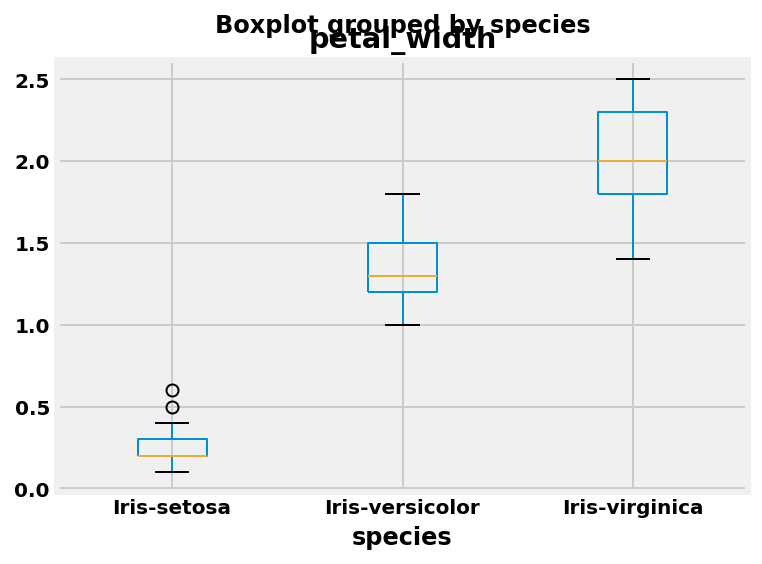

In [13]:
# Let's create a box plot of petal_width, grouped by species #
iris.boxplot(column='petal_width', by='species');

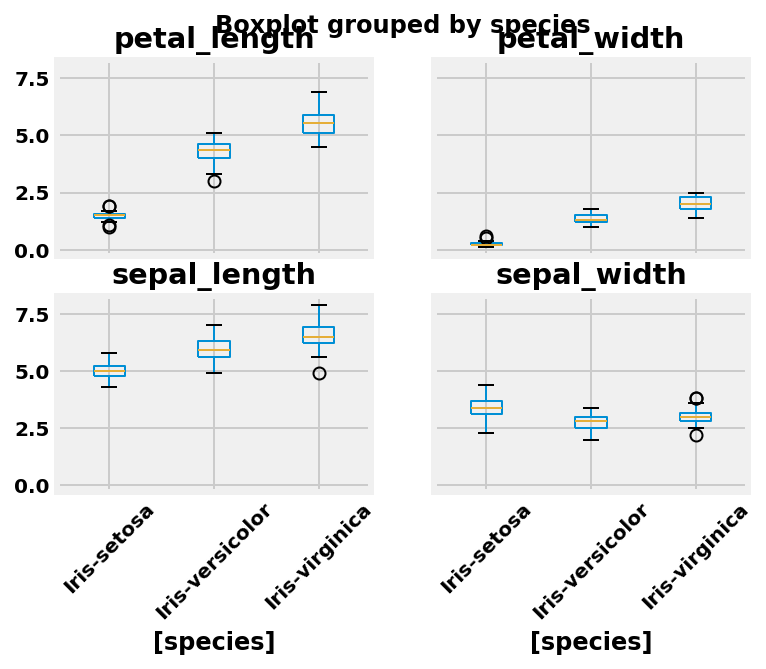

In [14]:
# Let's create a box plot of all the numeric columns, grouped by species #
iris.boxplot(by='species', rot=45);

In [15]:
# Let's map the species to a numeric value so that the plots can be colored by species #
iris['species_num'] = iris.species.factorize()[0]

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
32,5.2,4.1,1.5,0.1,Iris-setosa,0
13,4.3,3.0,1.1,0.1,Iris-setosa,0
37,4.9,3.1,1.5,0.1,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,0


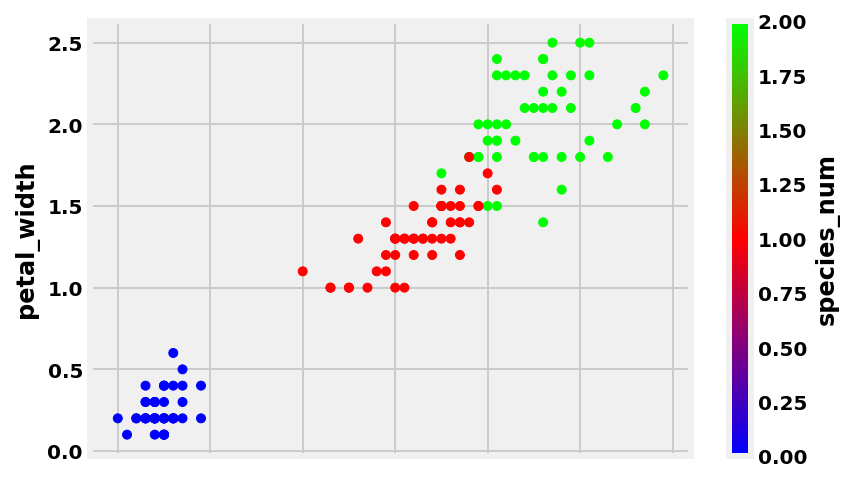

In [16]:
# Let's create a scatterplot of petal_width vs. petal_length, colored by species #
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg');

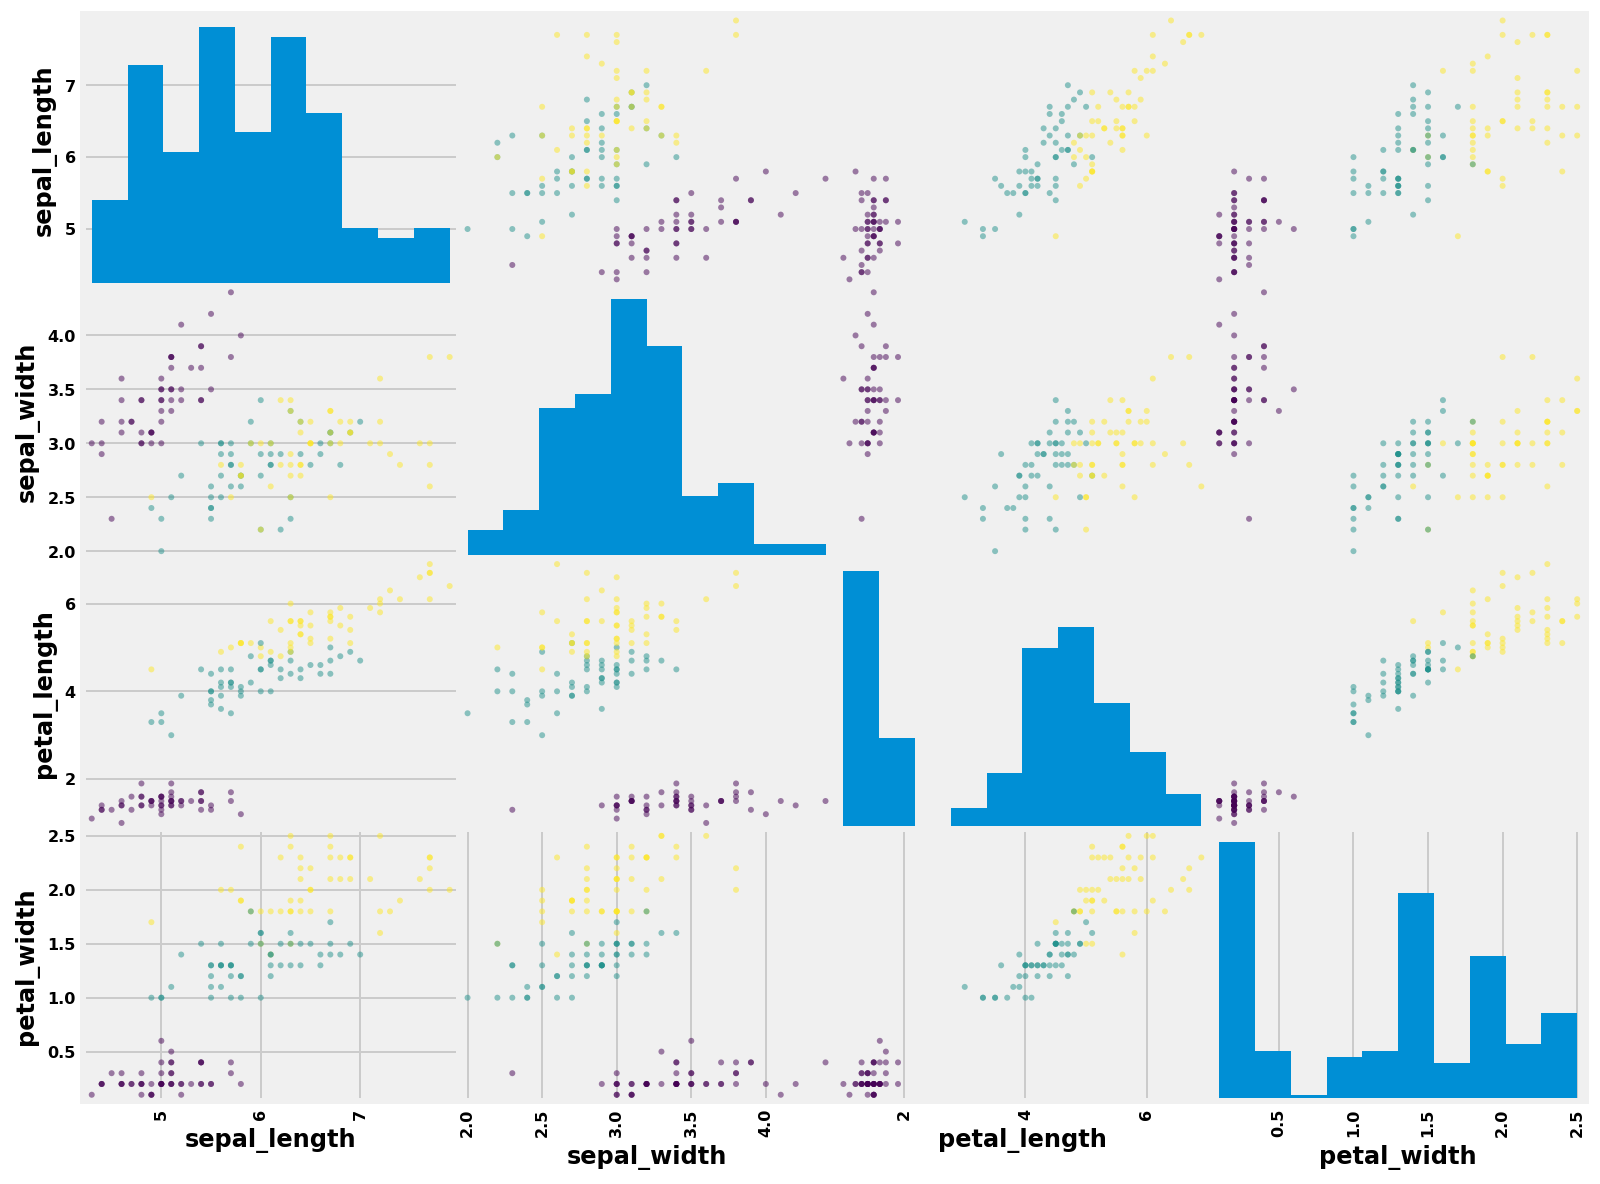

In [17]:
# Let's create a scatter matrix of all the features, colored by species #
pd.plotting.scatter_matrix(iris.drop('species_num', axis=1), c=iris.species_num, figsize=(12, 10));

In [18]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
32,5.2,4.1,1.5,0.1,Iris-setosa,0
13,4.3,3.0,1.1,0.1,Iris-setosa,0
37,4.9,3.1,1.5,0.1,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,0
34,4.9,3.1,1.5,0.1,Iris-setosa,0
0,5.1,3.5,1.4,0.2,Iris-setosa,0
27,5.2,3.5,1.5,0.2,Iris-setosa,0
28,5.2,3.4,1.4,0.2,Iris-setosa,0
29,4.7,3.2,1.6,0.2,Iris-setosa,0


In [19]:
# Using the formula for the area of an ellipse, let's define a new feature #
iris['petal_area'] = ((iris.petal_length/2) * (iris.petal_width/2) * np.pi)

In [20]:
# Let's check the petal_area, grouped by species #
iris.groupby('species').petal_area.describe().unstack()

       species        
count  Iris-setosa        50.000000
       Iris-versicolor    50.000000
       Iris-virginica     50.000000
mean   Iris-setosa         0.284942
       Iris-versicolor     4.492792
       Iris-virginica      8.872015
std    Iris-setosa         0.143922
       Iris-versicolor     1.074741
       Iris-virginica      1.694428
min    Iris-setosa         0.086394
       Iris-versicolor     2.591814
       Iris-virginica      5.890486
25%    Iris-setosa         0.208131
       Iris-versicolor     3.817035
       Iris-virginica      7.632107
50%    Iris-setosa         0.235619
       Iris-versicolor     4.410011
       Iris-virginica      8.988882
75%    Iris-setosa         0.329867
       Iris-versicolor     5.301438
       Iris-virginica     10.045243
max    Iris-setosa         0.753982
       Iris-versicolor     6.785840
       Iris-virginica     12.464269
dtype: float64

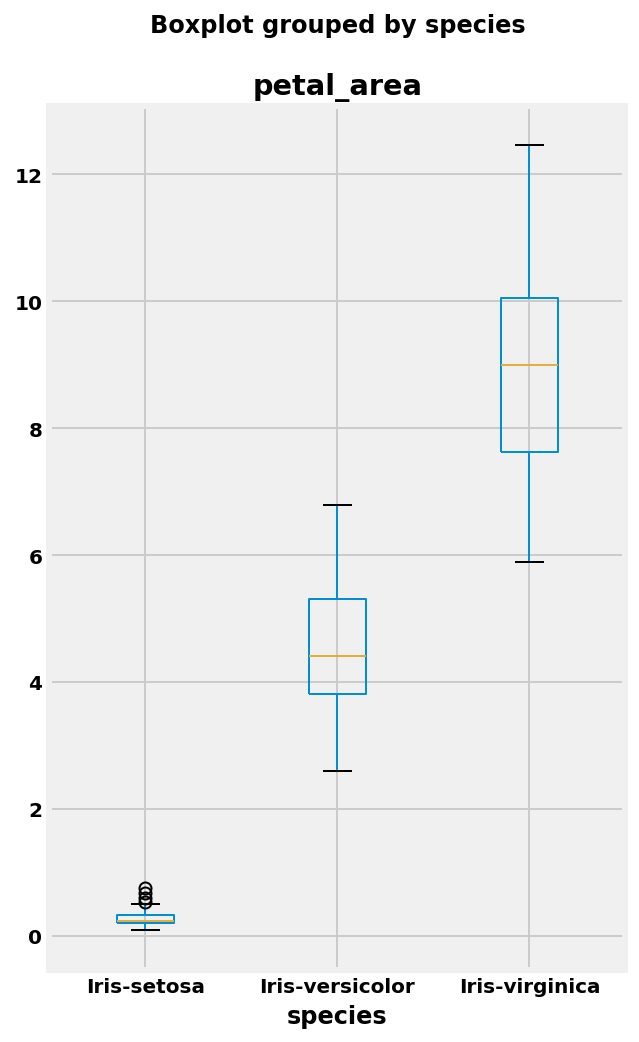

In [21]:
# Let's create a box plot of the petal_area, grouped by species #
iris.boxplot(column='petal_area', by='species',figsize=(5,8));

In [22]:
# Let's only show irises with a petal_area between 3 and 7 #
iris[(iris.petal_area > 3) & (iris.petal_area < 7)].sort_values('petal_area')

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area
62,6.0,2.2,4.0,1.0,Iris-versicolor,1,3.141593
67,5.8,2.7,4.1,1.0,Iris-versicolor,1,3.220132
80,5.5,2.4,3.8,1.1,Iris-versicolor,1,3.282964
69,5.6,2.5,3.9,1.1,Iris-versicolor,1,3.369358
82,5.8,2.7,3.9,1.2,Iris-versicolor,1,3.675663
64,5.6,2.9,3.6,1.3,Iris-versicolor,1,3.675663
92,5.8,2.6,4.0,1.2,Iris-versicolor,1,3.769911
95,5.7,3.0,4.2,1.2,Iris-versicolor,1,3.958407
53,5.5,2.3,4.0,1.3,Iris-versicolor,1,4.084070
89,5.5,2.5,4.0,1.3,Iris-versicolor,1,4.084070


In [23]:
# Let's write a function that accepts a row of data and returns a predicted species #
def predict_flower(df):
    
    preds = []
    
    for ind, row in df.iterrows():        
        if row.petal_area < 2:
            prediction = 'Iris-setosa'
        elif row.petal_area < 7.4:
            prediction = 'Iris-versicolor'
        else:
            prediction = 'Iris-virginica'
            
        preds.append(prediction)
    
    df['prediction'] = preds   
    
    
predict_flower(iris)

In [24]:
# Let's see what percentage our manual classifier gets correct #
sum(iris.species == iris.prediction) / 150.

0.9333333333333333

Now, let's try KNN machine learning. Here, we will use data from the NBA.

In [25]:
# Let's read in the NBA data #
path = 'data/NBA_players_2015.csv'
nba = pd.read_csv(path, index_col=0)

nba.head().T

season_end,2015,2015,2015,2015,2015
player,Quincy Acy,Jordan Adams,Steven Adams,Jeff Adrien,Arron Afflalo
pos,F,G,C,F,G
age,24,20,21,28,29
bref_team_id,NYK,MEM,OKC,MIN,TOT
g,52,18,51,17,60
gs,21,0,50,0,54
mp,19.2,7.3,24.2,12.6,32.5
fg,2.2,1,3,1.1,5
fga,4.6,2.1,5.5,2.6,11.8
fg_,0.469,0.474,0.55,0.432,0.426


In [26]:
# Let's map positions to numbers #
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

# Let's create a feature matrix (X) #
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]

# Let's create a response vector (y) #
y = nba.pos_num

In [27]:
# Let's split X and y into training and testing sets #
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Let's train the model on the training set #
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Let's test the model on the testing set and check the accuracy #
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.6583333333333333


In [28]:
# Let's repeat with K=50 #
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.675


Let's compare the testing accuracy with the null accuracy. The null accuracy is the accuracy that can be achieved by always predicting the most frequent class. Thus, it is a benchmark against which we may want to measure every classification model.

In [29]:
# Let's examine the class distribution from the training set #
most_freq_class = y_train.value_counts().index[0]

print(y_train.value_counts())
print('\nThe most frequent class:', most_freq_class)

1    149
2    146
0     63
Name: pos_num, dtype: int64

The most frequent class: 1


In [30]:
# Let's compute the null accuracy #
y_test.value_counts()[most_freq_class] / len(y_test)

0.4166666666666667

Let's try some parameter tuning.

In [31]:
# Let's instantiate the model (using the value K=5) #
knn = KNeighborsClassifier(n_neighbors=5)

# Let's fit the model with data #
knn.fit(X, y)

# Let's store the predicted response values #
y_pred_class = knn.predict(X)

In [32]:
# Let's calculate the predicted probabilities of class membership #
# Each row sums to one and contains the probabilities of the point being a 0-Center, 1-Front, 2-Guard #
knn.predict_proba(X)

array([[0. , 0.6, 0.4],
       [0. , 0.8, 0.2],
       [0.8, 0.2, 0. ],
       ...,
       [0. , 0.6, 0.4],
       [0.6, 0.4, 0. ],
       [0.6, 0.4, 0. ]])

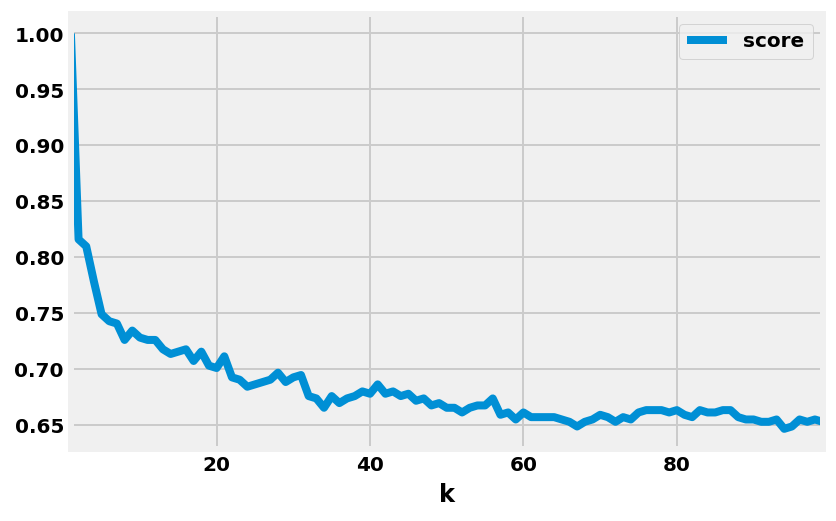

In [33]:
# Let's see the accuracy of our training data #
scores = []

for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

We can see that K is inversely proportional to the accuracy. At some point, increasing K stops eliminating outliers and starts smoothing over the actual class boundaries; resulting in mispredictions. Let's search for the "best" value for K.

In [34]:
# Let's calculate the training error and the testing error for K=1 through k=100 #
k_range = list(range(1, 101))
training_error = []
testing_error = []

# Let's find the test accuracy for all values of K between 1 and 100 (inclusive) #
for k in k_range:
    # Let's instantiate the model with the current K value #
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Let's calculate the training error (error = 1 - accuracy) #
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Let's calculate the testing error #
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [35]:
# Let's create a DataFrame of K, the training error, and the testing error #
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,training error,testing error
K,,
100,0.382845,0.375000
99,0.376569,0.366667
98,0.370293,0.366667
97,0.378661,0.366667
96,0.378661,0.366667


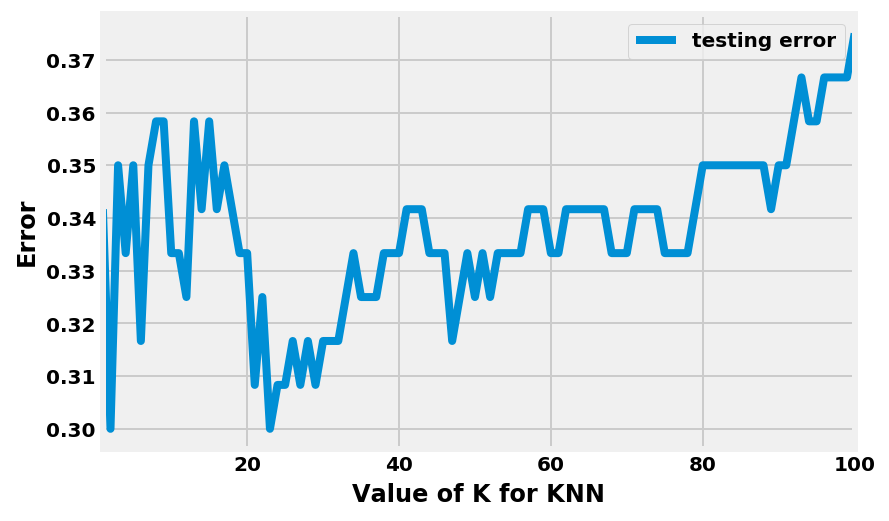

In [36]:
# Let's plot the relationship between K and the testing error #
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error');

In [37]:
# Let's find the minimum testing error and its associated K value #
df.sort_values('testing error').head()

,training error,testing error
K,,
2,0.217573,0.300000
23,0.303347,0.300000
29,0.326360,0.308333
27,0.320084,0.308333
21,0.290795,0.308333


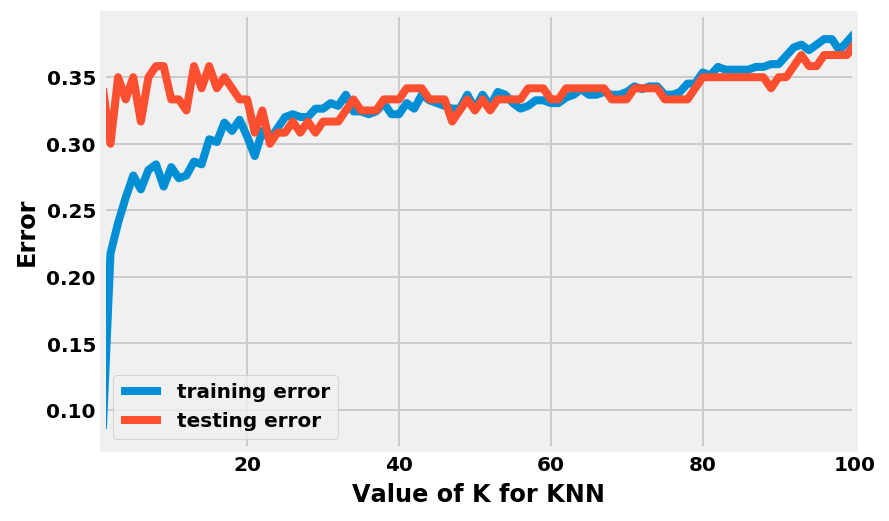

In [38]:
# Let's plot the relationship between K and both the training error and the testing error #
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error');

Let's make predictions on out-of-sample data. Given the statistics of a (truly) unknown NBA player, how do we predict his position?

In [39]:
# Let's instantiate the model with the best-known parameters #
knn = KNeighborsClassifier(n_neighbors=2)

# Let's re-train the model with X and y #
knn.fit(X, y)

# Now, let's make a prediction for an out-of-sample observation #
knn.predict(np.array([2, 1, 0, 1, 2]).reshape(1, -1))

array([2], dtype=int64)

Unfortunately, there is one major issue that applies to many machine learning models: they are sensitive to the feature scale. The KNN model in particular is sensitive to the feature scale because it (by default) uses the Euclidean distance metric. However, we can always standardize our data.

In [40]:
# Let's create a feature matrix (X) and a response vector (y) #
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]
y = nba.pos_num

# Let's create the train/test split #
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Let's instantiate and fit StandardScaler #
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Let's calculate the testing error #
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print(testing_error)

0.32499999999999996


Let's continue practicing with KNN on cell phone churn data. Our goal is to predict whether a user will churn or not based on the other features.

In [42]:
# Let's begin with reading in the data #
churn = pd.read_csv('./data/churn_missing.csv')

churn.head().T

,0,1,2,3,4
state,KS,OH,NJ,OH,OK
account_length,128,107,137,84,75
area_code,415,415,415,408,415
intl_plan,no,no,no,yes,yes
vmail_plan,yes,yes,no,no,no
vmail_message,25,26,0,0,0
day_mins,265.1,161.6,243.4,299.4,166.7
day_calls,110,123,114,71,113
day_charge,45.07,27.47,41.38,50.9,28.34
eve_mins,197.4,195.5,121.2,61.9,148.3


In [43]:
# Let's check how many rows and columns there are #
print('rows:', churn.shape[0], '\ncolumns:', churn.shape[1])

rows: 3333 
columns: 20


In [44]:
# Let's check for any missing data #
churn.isnull().sum()

state               0
account_length      0
area_code           0
intl_plan           0
vmail_plan        400
vmail_message     400
day_mins            0
day_calls           0
day_charge          0
eve_mins            0
eve_calls           0
eve_charge          0
night_mins          0
night_calls         0
night_charge        0
intl_mins           0
intl_calls          0
intl_charge         0
custserv_calls      0
churn               0
dtype: int64

In [45]:
# Let's check the data types #
churn.dtypes

state              object
account_length      int64
area_code           int64
intl_plan          object
vmail_plan         object
vmail_message     float64
day_mins          float64
day_calls           int64
day_charge        float64
eve_mins          float64
eve_calls           int64
eve_charge        float64
night_mins        float64
night_calls         int64
night_charge      float64
intl_mins         float64
intl_calls          int64
intl_charge       float64
custserv_calls      int64
churn                bool
dtype: object

In [46]:
# Let's check the value counts for intl_plan #
churn.intl_plan.value_counts(dropna=False)

no     3010
yes     323
Name: intl_plan, dtype: int64

In [47]:
# Let's check the value counts for vmail_plan #
churn.vmail_plan.value_counts(dropna=False)

no     2130
yes     803
NaN     400
Name: vmail_plan, dtype: int64

In [48]:
# Let's check the value counts for state #
churn.state.value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
ID     73
VT     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
NC     68
NJ     68
MT     68
NV     66
WA     66
CO     66
MS     65
RI     65
MA     65
AZ     64
FL     63
MO     63
ND     62
NM     62
ME     62
NE     61
DE     61
OK     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

Let's note that DC is being counted as a state and about 12% of vmail plan & message are null values.

In [49]:
# Let's convert the vmail_plan and intl_plan columns into binary integer columns #
churn.loc[:,'vmail_plan'] = churn.vmail_plan.map(lambda x: 1 if x == 'yes' else 0 if x == 'no' else x)
churn.loc[:,'intl_plan'] = churn.intl_plan.map(lambda x: 1 if x == 'yes' else 0 if x == 'no' else x)

In [50]:
# Let's create dummy coded columns for state and concatenate it to the churn dataset #
# Let's leave out the first state dummy column to serve as the "reference" column #
states = pd.get_dummies(churn.state, drop_first=True)
states.head(3)

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Let's check if the rows and columns match the original dataset #
print('rows:', states.shape[0], '\ndummy states:', states.shape[1])
print('original states:',len(churn.state.unique()))

rows: 3333 
dummy states: 50
original states: 51


In [52]:
# Now, let's concatenate #
churn = pd.concat([churn, states], axis=1)
churn.sample(3).T

,336,1046,2880
state,SC,RI,KS
account_length,99,158,107
area_code,510,510,415
intl_plan,0,0,0
vmail_plan,0,NaN,NaN
vmail_message,0,NaN,NaN
day_mins,169.2,220.9,260.5
day_calls,70,129,108
day_charge,28.76,37.55,44.29
eve_mins,271.5,242.2,102.4


Next, let's create a version of the churn data that has no missing values present to use for modeling.

In [53]:
# Let's check how many rows and columns are left after dropping the null values #
# Note: dummies are included #
churn_nona = churn.dropna()
print('rows:', churn_nona.shape[0], '\ncolumns:', churn_nona.shape[1])

rows: 2933 
columns: 70


In [54]:
# Let's create a target vector and a predictor matrix #
X = churn_nona.drop(['area_code','state','churn'], axis =1)
y = churn_nona.churn.values

In [55]:
# Let's calculate the baseline accuracy for churn #
baseline = 1. - churn_nona.churn.mean()
print(baseline)

0.8564609614728946


In [56]:
# Let's instantiate the knn model #
knn = KNeighborsClassifier(n_neighbors=5)

# Let's standardize the predictor matrix #
ss = StandardScaler()
Xs = ss.fit_transform(X)

# Let's cross-validate the KNN model predicting churn #
scores = cross_val_score(knn, Xs, y, cv=10)
print(scores)
print('\nmean of scores:',np.mean(scores))

[0.84745763 0.86054422 0.86006826 0.85665529 0.87030717 0.85665529
 0.85665529 0.85324232 0.85665529 0.85665529]

mean of scores: 0.8574896042757937


In [57]:
# Let's iterate from k=1 to k=49 (odd) and cross-validate the accuracy of the model for each #
k_values = list(range(1,50,2))
accs = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xs, y, cv=10)
    accs.append(np.mean(scores))

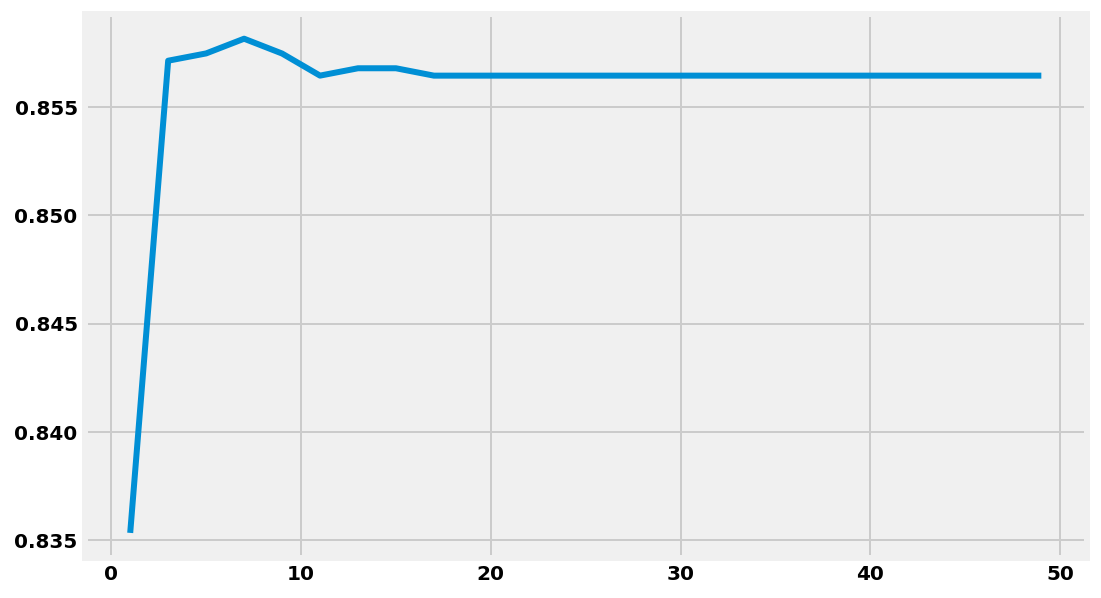

maximum accuracy of 0.8581698921253003 obtained when k is 7


In [58]:
# Let's plot the cross-validated mean accuracy for each score #
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(k_values, accs, lw=3)
plt.show()

for a, b in list(zip(k_values,accs)):
    if b == np.max(accs):
        print('maximum accuracy of',b,'obtained when k is',a)
    else: pass

Let's introduce a dataset of NHL statistics and see if we can use KNN modeling to predict the rank of a team.

In [59]:
# Let's read in the data #
NHL = pd.read_csv('./data/NHL_Data_GA.csv')
NHL.head().T

,0,1,2,3,4
Team,Washington10,Vancouver11,San Jose10,Chicago10,Vancouver12
PTS,121,117,113,112,111
Rank,1,1,1,1,1
TOI,2001:52:00,2056:14:00,1929:54:00,2020:23:00,2052:02:00
GF,115,94,90,104,86
GA,73,72,68,83,74
GF60,3.45,2.74,2.8,3.09,2.51
GA60,2.19,2.1,2.11,2.46,2.16
GF%,61.2,56.6,57,55.6,53.8
SF,1112,1143,1065,1186,1078


In [60]:
# Let's check how many rows and columns there are #
print('rows:', NHL.shape[0], '\ncolumns:', NHL.shape[1])

rows: 90 
columns: 28


In [61]:
# Let's check out the statistics on the data #
NHL.describe().T

,count,mean,std,min,25%,50%,75%,max
PTS,90.0,91.977778,12.524114,62.00,82.2500,92.500,102.000,121.00
Rank,90.0,2.022222,0.820767,1.00,1.0000,2.000,3.000,3.00
GF,90.0,83.288889,10.376339,57.00,76.0000,84.000,90.000,115.00
GA,90.0,83.288889,9.694484,64.00,75.5000,84.000,89.000,107.00
GF60,90.0,2.442222,0.325331,1.70,2.2325,2.400,2.600,3.45
GA60,90.0,2.444000,0.313522,1.73,2.2025,2.495,2.670,3.24
GF%,90.0,49.981111,4.644554,38.00,46.8250,49.700,53.625,61.20
SF,90.0,1068.333333,95.929047,815.00,1011.5000,1072.000,1143.000,1311.00
SA,90.0,1068.333333,75.514118,868.00,1022.2500,1072.000,1125.750,1245.00
SF60,90.0,31.252222,2.237637,25.80,29.5500,31.400,32.775,35.60


In [62]:
# Let's check for any missing data #
NHL.isnull().sum()

Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

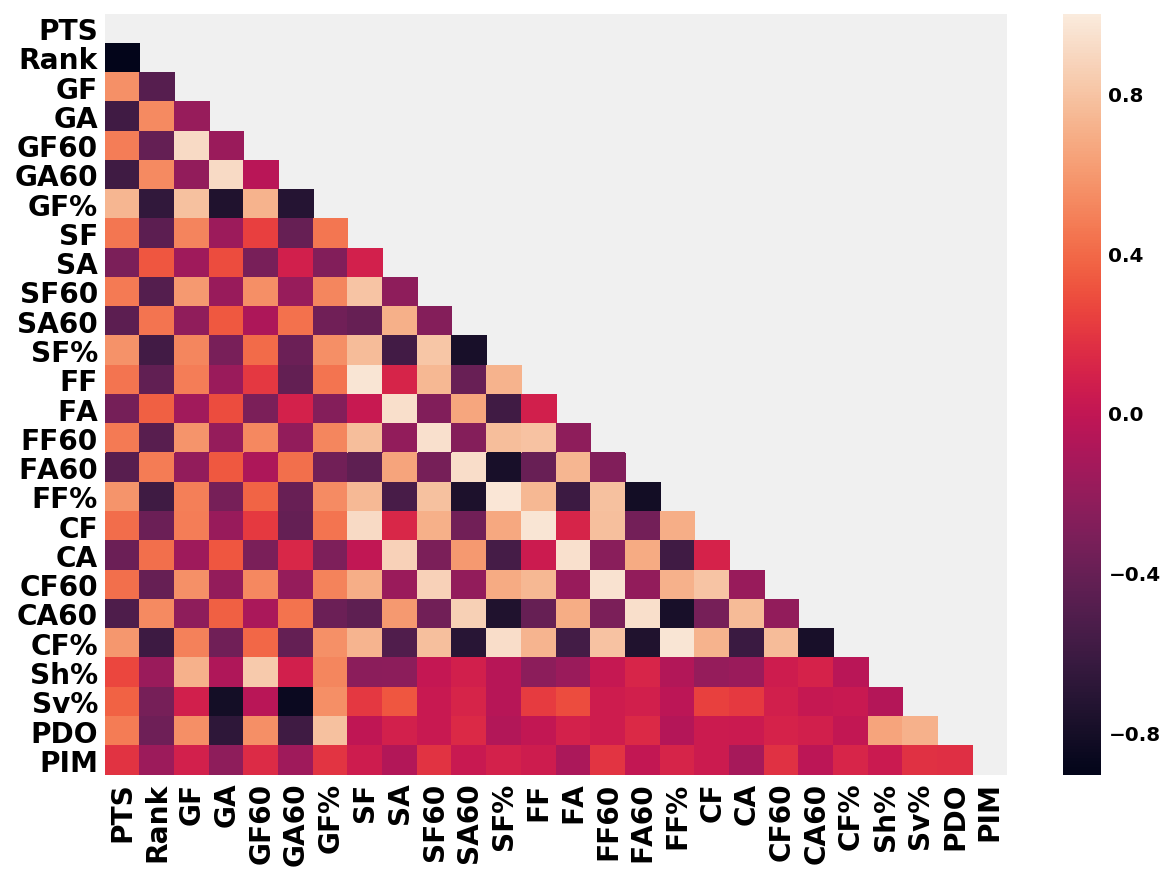

In [63]:
# Let's check if there are any correlations between features within the dataset #
corr = NHL.corr()

fig, ax = plt.subplots(figsize=(9,7))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

In [64]:
# Let's check for unique values within the rank feature #
print('number of unique values:',NHL.Rank.nunique())
print('unique values:',NHL.Rank.unique())

number of unique values: 3
unique values: [1 2 3]


In [65]:
# Let's create the response vector #
y = NHL.Rank

In [66]:
# Let's calculate the baseline accuracies #
y.value_counts()/y.count()

3    0.344444
2    0.333333
1    0.322222
Name: Rank, dtype: float64

In [67]:
# Let's choose 4 features as predictor variables to set up our matrix #
feature_cols = ['CF%', 'GF', 'Sh%', 'PDO']
X = NHL[feature_cols]
X.head()

,CF%,GF,Sh%,PDO
0,52.5,115,10.34,1034
1,53.4,94,8.22,1014
2,51.4,90,8.45,1019
3,57.1,104,8.77,992
4,52.6,86,7.98,1013


In [68]:
# Let's instantiate the knn model #
knn = KNeighborsClassifier(n_neighbors=1)

# Let's fit on the unstandardized data #
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [69]:
# Let's predict the response values and check our accuracy #
y_pred_class = knn.predict(X)

print('model accuracy:',metrics.accuracy_score(y, y_pred_class))

model accuracy: 1.0


An accuracy score of 100% is indicative that we are overfitting. Let's create a 50-50 train-test-split of our target and predictors.

In [70]:
# Let's split X and y into training and testing sets #
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5)

# Let's train the model on the training set #
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Let's test the model on the testing set and check the accuracy #
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.5111111111111111


In [71]:
# Let's check the accuracy of a KNN model where K equals the number of rows in the training data #
knn = KNeighborsClassifier(n_neighbors=X_train.shape[0])
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.3111111111111111


In [72]:
# Let's fit the KNN with values of K ranging from 1 to the number of rows in the training data #
test_acc = []
for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))

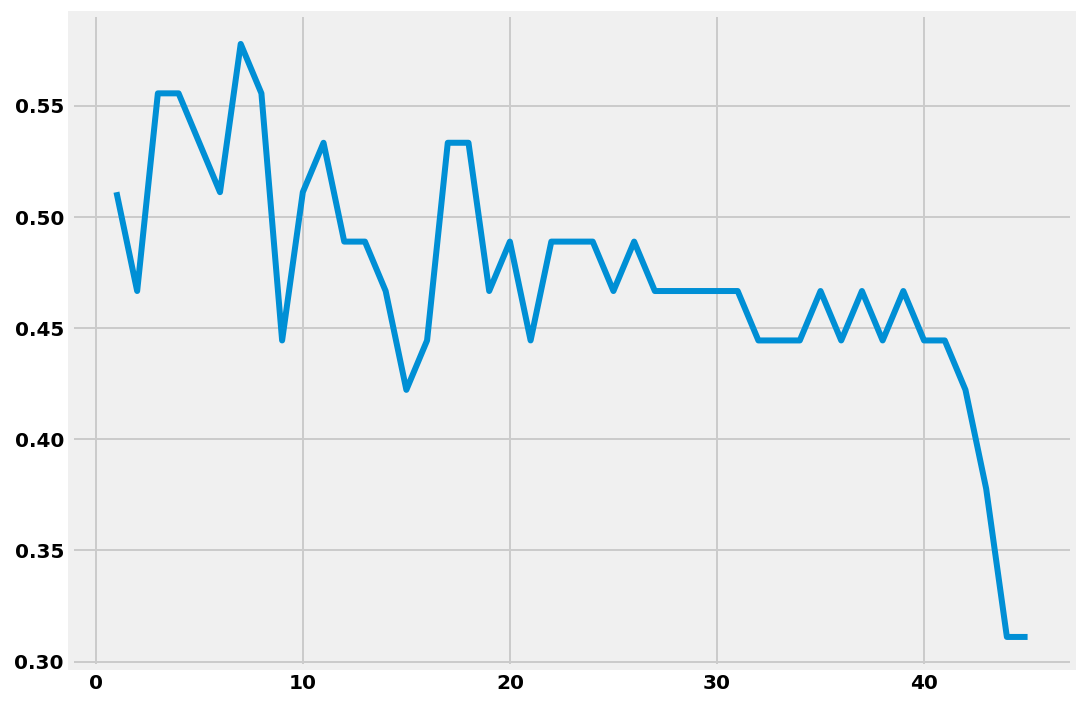

In [73]:
# Let's plot the accuracies for each K #
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, X_train.shape[0]+1)), test_acc, lw=3.)
plt.show()

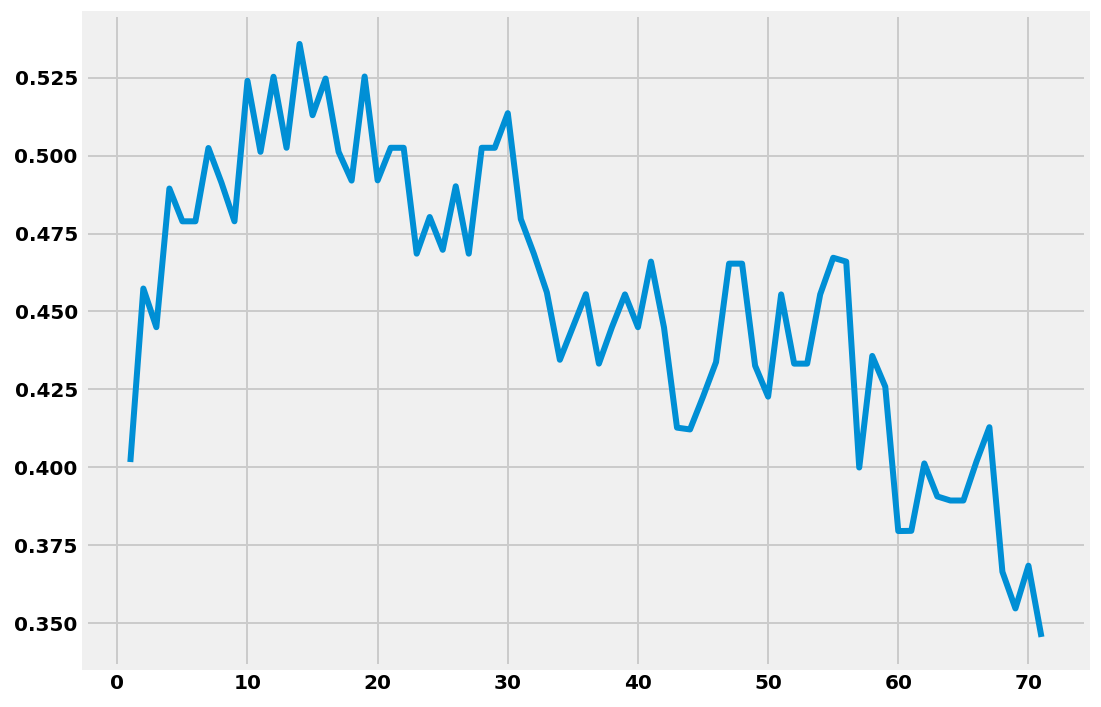

In [74]:
# Let's fit the model across different values of K and plot the mean cross-validated accuracy with 5 folds #
folds = 5

max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)

test_acc = []

for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc.append(np.mean(cross_val_score(knn, X, y, cv=5)))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
plt.show()

In [75]:
# Let's standardize the predictor matrix and cross-validate across the different K #
ss = StandardScaler()
Xs = ss.fit_transform(X)

test_acc_std = []

for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc_std.append(np.mean(cross_val_score(knn, Xs, y, cv=5)))

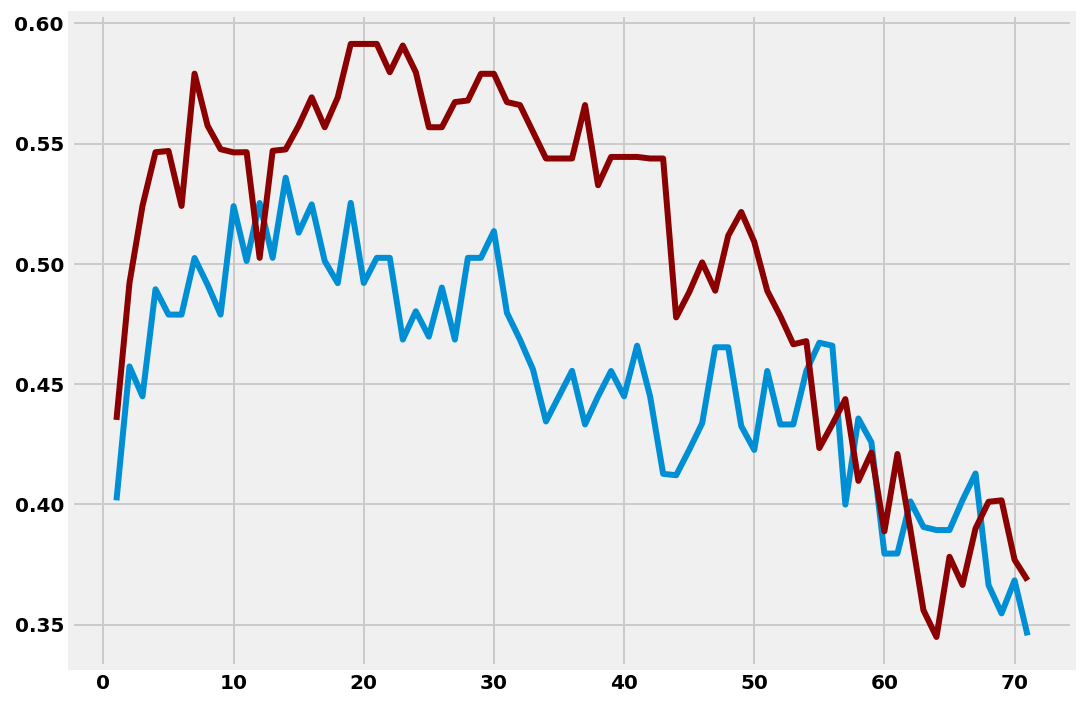

In [76]:
# Let's plot the standardized mean cross-validated accuracy against the unstandardized #
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
ax.plot(list(range(1, int(max_neighbors))), test_acc_std, lw=3., color='darkred')
plt.show()

We can observe from the plot above that the standardized data (red) provides us with a much better accuracy than the unstandardized data (blue).